In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("cars.csv")

In [3]:
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0.0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0.0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0.0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1.0,5,13.4,4.5,0,Public Transport
4,27,Male,1,0.0,4,13.4,4.6,0,Public Transport


# Dataset Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        443 non-null    float64
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 31.3+ KB


1. 444 employee records
2. 9 variables (Dependent variable is Transport and rest are Independent variables)
3. No missing values excep 1 value in MBA variable
4. 4 variables with int64 data type
5. 3 variables with float64 data type
6. 2 variables with object data type

In [5]:
df.isnull()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
439,False,False,False,False,False,False,False,False,False
440,False,False,False,False,False,False,False,False,False
441,False,False,False,False,False,False,False,False,False
442,False,False,False,False,False,False,False,False,False


<Axes: >

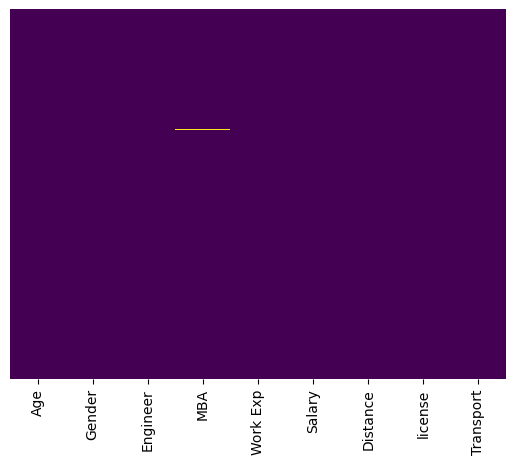

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          1
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

In [8]:
df.shape

(444, 9)

<Axes: xlabel='Gender', ylabel='count'>

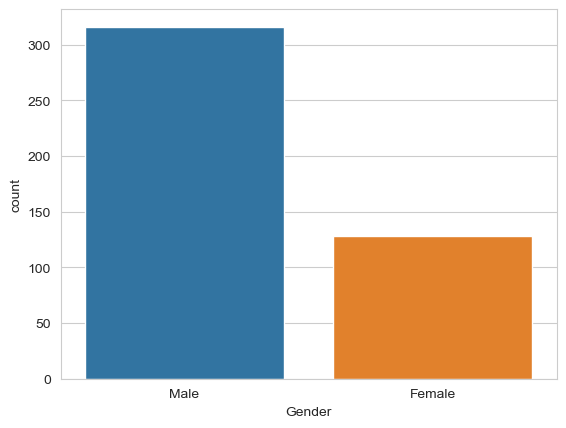

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',data=df)

In [10]:
df.describe(include="O")

,Gender,Transport
count,444,444
unique,2,3
top,Male,Public Transport
freq,316,300


# EDA - Univariate Analysis

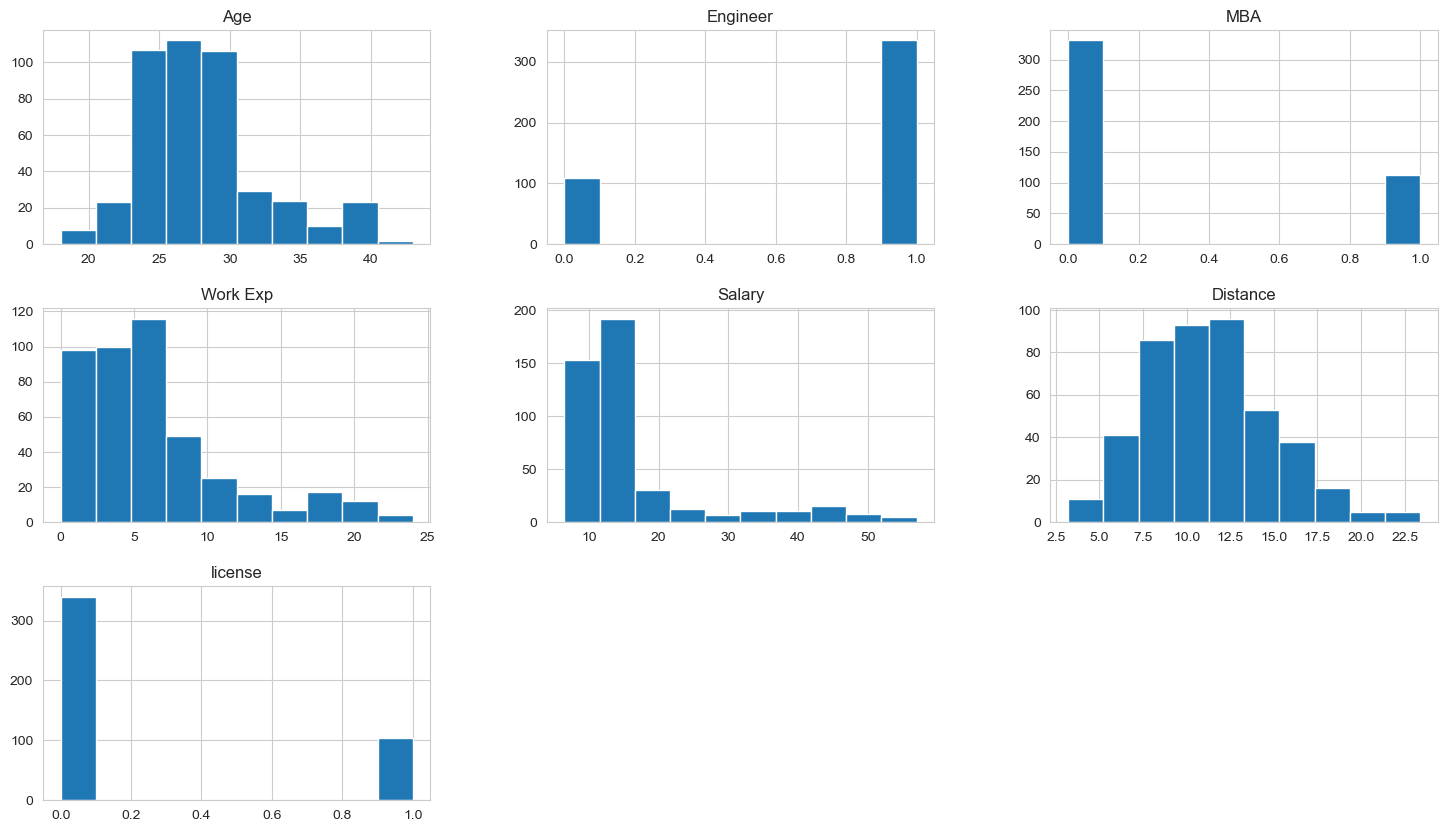

In [11]:
df.hist(figsize=(18,10))
plt.show()

- Age variable looks right skewed with most of the employees between the age of 23 to 30 years.
- Distance variable looks slightly right skewed with most of the employees traveling distance between 7.5 to 13.
- Salary variable looks right skewed with most of the employees earning salary less than 17.5.
- Work Exp variable looks right skewed with most of the employees having work experience between 0 to 8 years.

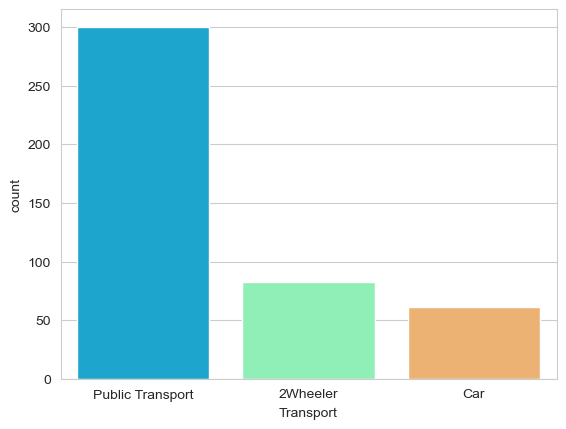

In [12]:
sns.countplot(x='Transport',data=df,palette='rainbow')
plt.show()

- In depandent variable Transport, classes are not balanced.
- Class 'Public Transport' is 68%
- Class '2Wheeler Transport' is 18%
- Class 'Car' is 14%


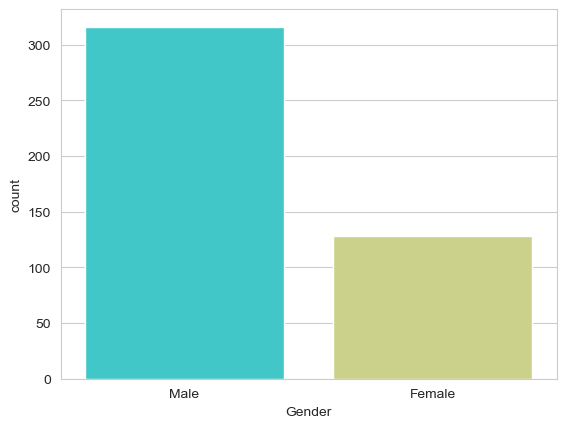

In [13]:
sns.countplot(x='Gender',data=df,palette='rainbow')
plt.show()

- In variable Gender, classes are not balanced.
- Class 'Male' is 71%
- Class 'Female' is 29%

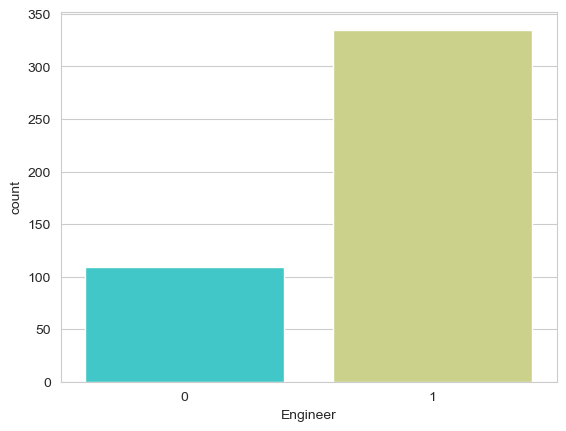

In [14]:
sns.countplot(x='Engineer',data=df,palette='rainbow')
plt.show()

- In variable Engineer, classes are not balanced.
- Class '0' is 24% (Non Engineer employees)
- Class '1' is 76% (Engineer employees)

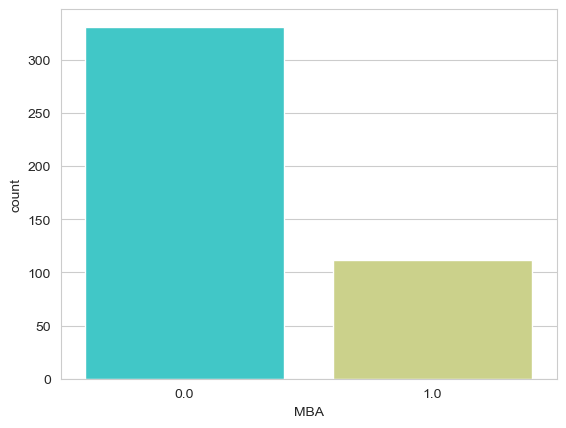

In [15]:
sns.countplot(x='MBA',data=df,palette='rainbow')
plt.show()

- In variable MBA, classes are not balanced.
- Class '0' is 75% (Non MBA employees)
- Class '1' is 25% (MBA employees)

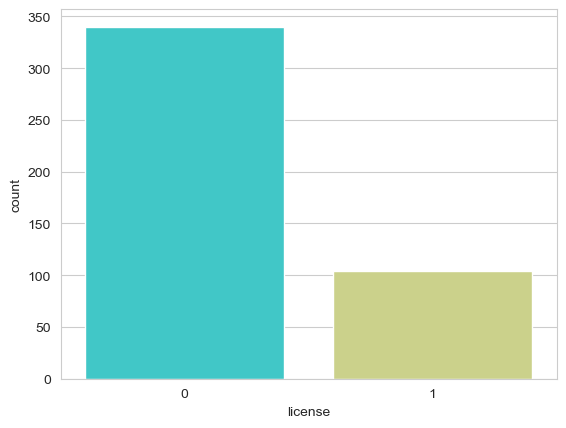

In [16]:
sns.countplot(x='license',data=df,palette='rainbow')
plt.show()

- In variable license, classes are not balanced.
- Class '0' is 77% (Employees dont have license)
- Class '1' is 23% (Employees have license)

# EDA - Bivariate Analysis

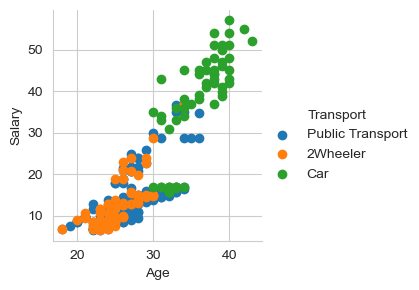

In [17]:
sns.FacetGrid(df, hue="Transport").map(plt.scatter, "Age", "Salary").add_legend()
plt.show()

- Employees traveling in Car are above the Age of 30 and mostly getting Salary more than 30.
- Although some employees who travel in Car and are above the Age of 30 are getting Salary between15 to 18.
- Positive linear relation ship is their between Age and Salary.

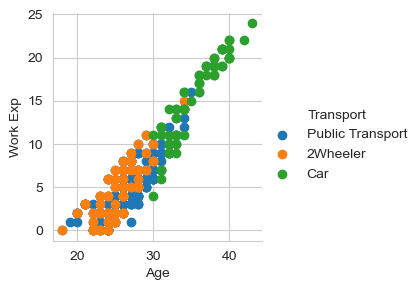

In [18]:
sns.FacetGrid(df, hue="Transport").map(plt.scatter, "Age", "Work Exp").add_legend()
plt.show()


- Employees traveling in Car are above the Age of 30 and mostly have Work Exp more than 6.
- Although one employee who travel in Car and are above the Age of 30 have Work Exp of 4.
- Positive linear relation ship is their between Age and Work Exp.

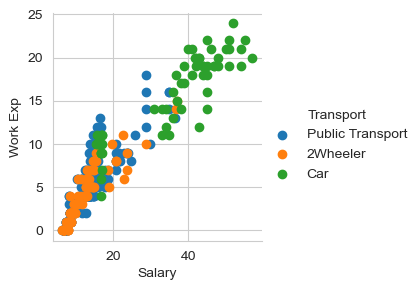

In [19]:
sns.FacetGrid(df, hue="Transport").map(plt.scatter, "Salary", "Work Exp").add_legend()
plt.show()

- Positive linear relation ship is their between Salary and Work Exp.


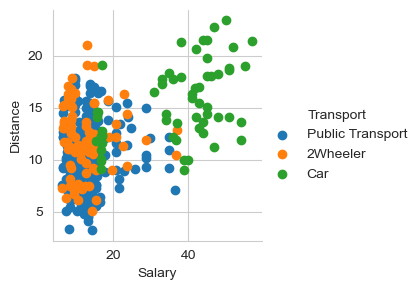

In [20]:
sns.FacetGrid(df, hue="Transport").map(plt.scatter,  "Salary","Distance").add_legend()
plt.show()

- Employees traveling distance of more than 9 are using Car.
- No linear relation ship is their between Salary and Distance.

In [21]:
df.corr()

C:\Users\aryxn\AppData\Local\Temp\ipykernel_9132\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Engineer,MBA,Work Exp,Salary,Distance,license
Age,1.000000,0.091935,-0.029027,0.932236,0.860673,0.352872,0.452311
Engineer,0.091935,1.000000,0.064167,0.085729,0.086762,0.059316,0.018924
MBA,-0.029027,0.064167,1.000000,0.008508,-0.007592,0.035752,-0.028103
Work Exp,0.932236,0.085729,0.008508,1.000000,0.931974,0.372735,0.452867
Salary,0.860673,0.086762,-0.007592,0.931974,1.000000,0.442359,0.508095
Distance,0.352872,0.059316,0.035752,0.372735,0.442359,1.000000,0.290084
license,0.452311,0.018924,-0.028103,0.452867,0.508095,0.290084,1.000000


C:\Users\aryxn\AppData\Local\Temp\ipykernel_9132\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

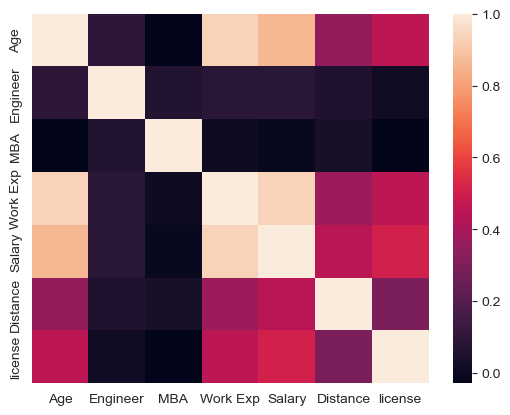

In [22]:
sns.heatmap(df.corr())

- High positive correlation of 93% between Age and Work Exp
- High positive correlation of 86% between Age and Salary
- High positive correlation of 93% between Work Exp and Salary
- Correlation between Distance and other variables is low.

In [23]:
df.select_dtypes(exclude="object").columns.tolist()

['Age', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance', 'license']

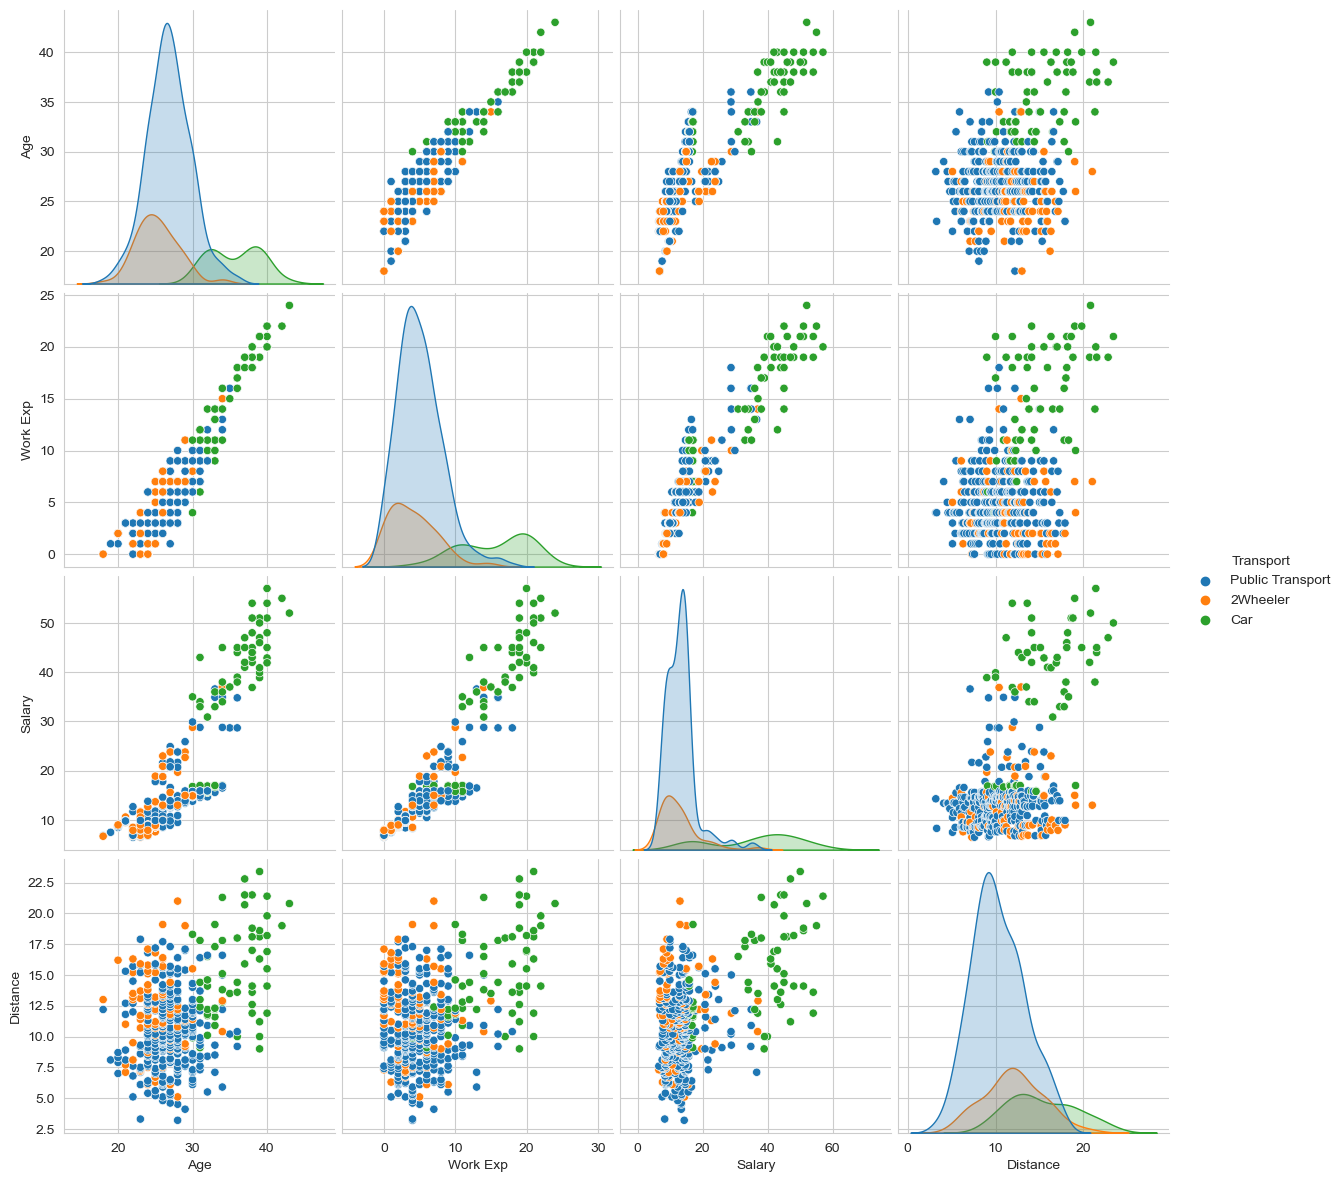

In [24]:
attributes = df[['Age', 'Work Exp', 'Salary', 'Distance', 'Transport']]
sns.pairplot(attributes, hue="Transport", height=3)
plt.show()

In [25]:
pd.crosstab(index     = df["Transport"],
            columns   = df["Gender"],
            margins   = True,
            normalize = "index" )

Gender,Female,Male
Transport,,
2Wheeler,0.457831,0.542169
Car,0.213115,0.786885
Public Transport,0.256667,0.743333
All,0.288288,0.711712


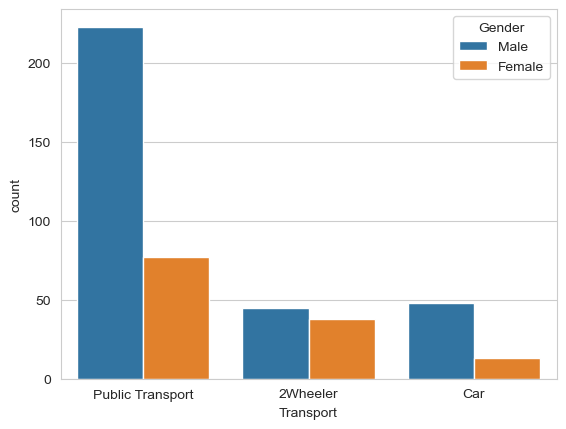

In [26]:
sns.countplot(x="Transport", hue="Gender", data=df)
plt.show()

- 79% of Male and only 21% Female employees uses Car for travel.
- 54% of Male and 46% Female employees uses 2Wheeler Transport for travel.
- 74% of Male and only 26% Female employees uses Public Transport for travel.

In [27]:
pd.crosstab(index     = df["Transport"],
            columns   = df["Engineer"],
            margins   = True,
            normalize = "index" )

Engineer,0,1
Transport,,
2Wheeler,0.277108,0.722892
Car,0.147541,0.852459
Public Transport,0.256667,0.743333
All,0.245495,0.754505


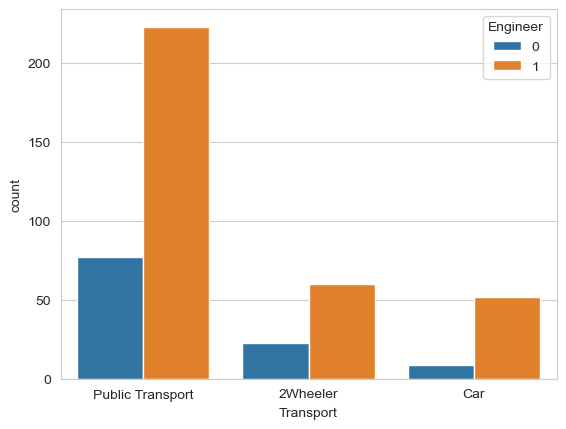

In [28]:
sns.countplot(x="Transport", hue="Engineer", data=df)
plt.show()

- 85% of Engineers and only 15% non Engineer employees uses Car for travel.
- 72% of Engineers and 28% non Engineer employees uses 2Wheeler Transport for travel.
- 74% of Engineers and only 26% non Engineer employees uses Public Transport for travel.

In [29]:
pd.crosstab(index     = df["Transport"],
            columns   = df["MBA"],
            margins   = True,
            normalize = "index" )

MBA,0.0,1.0
Transport,,
2Wheeler,0.795181,0.204819
Car,0.803279,0.196721
Public Transport,0.722408,0.277592
All,0.747178,0.252822


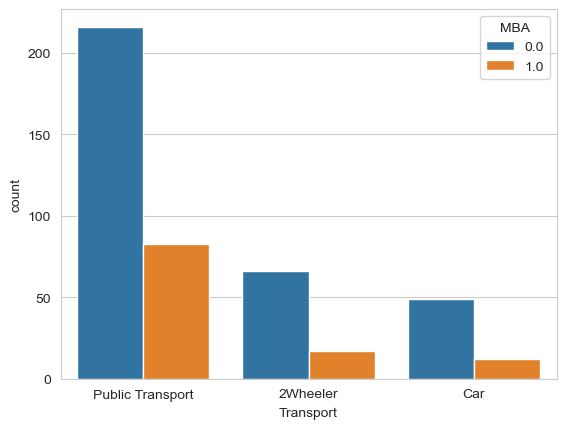

In [30]:
sns.countplot(x="Transport", hue="MBA", data=df)
plt.show()

- 80% of non MBA and only 20% MBA employees uses Car for travel.
- 80% of non MBA and 20% MBA employees uses 2Wheeler Transport for travel.
- 72% of non MBA and only 28% MBA employees uses Public Transport for travel.

In [31]:
pd.crosstab(index     = df["Transport"],
            columns   = df["license"],
            margins   = True,
            normalize = "index" )

license,0,1
Transport,,
2Wheeler,0.722892,0.277108
Car,0.213115,0.786885
Public Transport,0.890000,0.110000
All,0.765766,0.234234


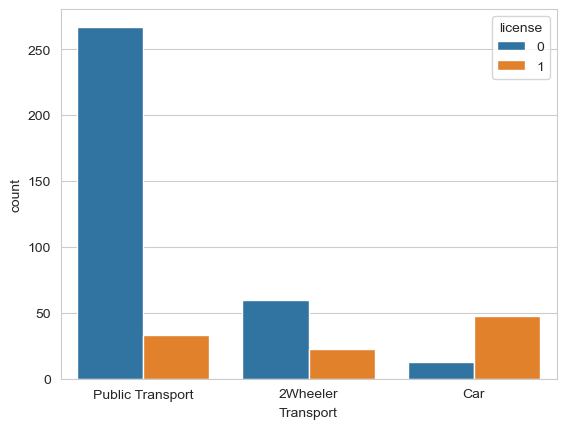

In [32]:
sns.countplot(x="Transport", hue="license", data=df)
plt.show()

- 21% of employees using Car for travel do not have license.
- 72% of employees using 2Wheeler Transport for travel do not have license.
- 89% of employees using Public Transport for travel do not have license.



# Dropping missing values 

In [33]:
cars_new = df.dropna(axis=0)
cars_new.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

# Handling outliers

In [34]:
def find_outliers(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    outlier_indices = list(x.index[(x < lower_bound) | (x > upper_bound)])
    outlier_values = list(x[outlier_indices])
    
    print ("Lower bound:", lower_bound)
    print("Upper bound:", upper_bound)
    print("Outliers:" ,outlier_values)

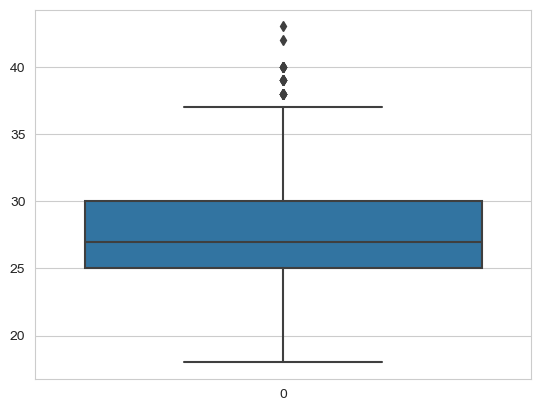

In [35]:
sns.boxplot(data=df["Age"])
plt.show()

In [36]:
find_outliers(df["Age"])


Lower bound: 17.5
Upper bound: 37.5
Outliers: [39, 39, 39, 38, 40, 38, 38, 38, 38, 40, 40, 39, 40, 38, 39, 38, 40, 39, 38, 42, 40, 43, 40, 38, 39]


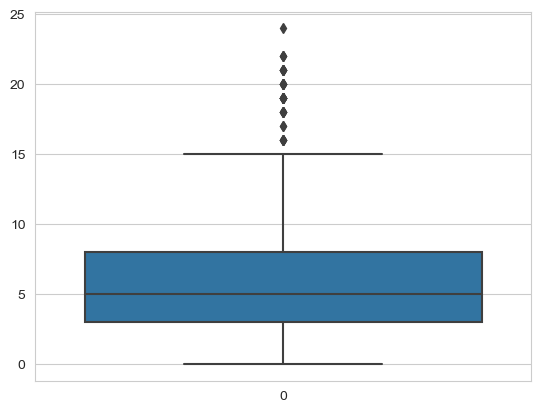

In [37]:
sns.boxplot(data=df["Work Exp"])
plt.show()

In [38]:
find_outliers(df["Work Exp"])


Lower bound: -4.5
Upper bound: 15.5
Outliers: [19, 16, 21, 17, 16, 18, 19, 18, 21, 16, 19, 19, 18, 19, 20, 22, 16, 20, 18, 21, 20, 20, 16, 17, 21, 18, 20, 21, 19, 22, 22, 19, 24, 20, 19, 19, 19, 21]


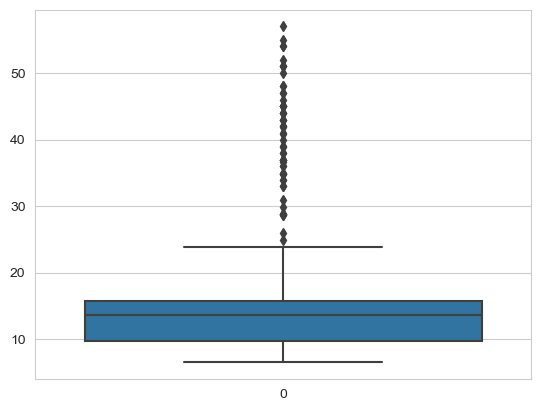

In [39]:
sns.boxplot(data=df["Salary"])
plt.show()

In [40]:
find_outliers(df["Salary"])

Lower bound: 0.9125000000000014
Upper bound: 24.612499999999997
Outliers: [36.6, 38.9, 25.9, 34.8, 28.8, 39.9, 39.0, 28.7, 36.9, 28.7, 34.9, 47.0, 28.8, 36.9, 54.0, 29.9, 34.9, 36.0, 44.0, 37.0, 24.9, 43.0, 37.0, 54.0, 44.0, 34.0, 48.0, 42.0, 51.0, 45.0, 34.0, 28.8, 45.0, 42.9, 41.0, 40.9, 30.9, 41.9, 43.0, 33.0, 36.0, 33.0, 38.0, 46.0, 45.0, 48.0, 35.0, 51.0, 51.0, 55.0, 45.0, 42.0, 52.0, 38.0, 57.0, 44.0, 45.0, 47.0, 50.0]


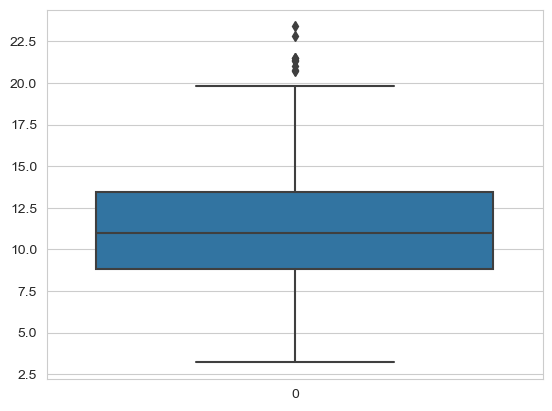

In [41]:
sns.boxplot(data=df["Distance"])
plt.show()

In [42]:
find_outliers(df["Distance"])

Lower bound: 1.8625000000000007
Upper bound: 20.3625
Outliers: [20.7, 20.8, 21.0, 21.3, 21.4, 21.5, 21.5, 22.8, 23.4]


# Variable Importance Check

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = cars_new.loc[:,['Age', 'Work Exp', 'Salary','Distance']]


X["Intercept"] = 1  

vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
print(vif)

   variables         VIF
0        Age    7.677817
1   Work Exp   15.312352
2     Salary    8.309499
3   Distance    1.263222
4  Intercept  212.571304


- As we can see very high VIF for Age, Work Exp and Salary.
- We have observed earlier that Work Exp variable has high correlation with Age and Salary.
- Let's remove Work Exp variable and then check the VIF.

In [44]:
X_new = cars_new.loc[:,['Age', 'Salary','Distance']]
X_new["Intercept"] = 1

vif_new = pd.DataFrame()
vif_new["variables"] = X_new.columns
vif_new["VIF"] = [variance_inflation_factor(X_new.values, i)for i in range (X_new.shape[1])]
print(vif_new)

   variables         VIF
0        Age    3.873928
1     Salary    4.215489
2   Distance    1.247685
3  Intercept  108.879473


- Now VIF for all the variables is around 4 or less, which is good.
- Let's remove Work Exp variable and proceed with model building.

In [45]:
cars_new = cars_new.drop("Work Exp", axis=1)

In [46]:
cars_copy = cars_new.copy()

# Prepping the Data for Modelling 

In [47]:
cars_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 443
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        443 non-null    int64  
 1   Gender     443 non-null    object 
 2   Engineer   443 non-null    int64  
 3   MBA        443 non-null    float64
 4   Salary     443 non-null    float64
 5   Distance   443 non-null    float64
 6   license    443 non-null    int64  
 7   Transport  443 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 31.1+ KB


In [48]:
cars_copy["Engineer"] = cars_copy["Engineer"].astype("int64")
cars_copy["license"] = cars_copy["license"].astype("int64")
cars_copy["MBA"] = cars_copy["MBA"].astype("int64")
cars_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 443
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        443 non-null    int64  
 1   Gender     443 non-null    object 
 2   Engineer   443 non-null    int64  
 3   MBA        443 non-null    int64  
 4   Salary     443 non-null    float64
 5   Distance   443 non-null    float64
 6   license    443 non-null    int64  
 7   Transport  443 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 31.1+ KB


In [49]:
cars_copy.head()

,Age,Gender,Engineer,MBA,Salary,Distance,license,Transport
0,28,Male,0,0,14.3,3.2,0,Public Transport
1,23,Female,1,0,8.3,3.3,0,Public Transport
2,29,Male,1,0,13.4,4.1,0,Public Transport
3,28,Female,1,1,13.4,4.5,0,Public Transport
4,27,Male,1,0,13.4,4.6,0,Public Transport


In [50]:
cars_copy = pd.get_dummies(cars_copy, drop_first=True)
cars_copy.head()

,Age,Engineer,MBA,Salary,Distance,license,Gender_Male,Transport_Car,Transport_Public Transport
0,28,0,0,14.3,3.2,0,1,0,1
1,23,1,0,8.3,3.3,0,0,0,1
2,29,1,0,13.4,4.1,0,1,0,1
3,28,1,1,13.4,4.5,0,0,0,1
4,27,1,0,13.4,4.6,0,1,0,1


In [51]:
cars_final = cars_copy.drop("Transport_Public Transport", axis=1)

In [52]:
cars_final.head()

,Age,Engineer,MBA,Salary,Distance,license,Gender_Male,Transport_Car
0,28,0,0,14.3,3.2,0,1,0
1,23,1,0,8.3,3.3,0,0,0
2,29,1,0,13.4,4.1,0,1,0
3,28,1,1,13.4,4.5,0,0,0
4,27,1,0,13.4,4.6,0,1,0


In [53]:
cars_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 443
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            443 non-null    int64  
 1   Engineer       443 non-null    int64  
 2   MBA            443 non-null    int64  
 3   Salary         443 non-null    float64
 4   Distance       443 non-null    float64
 5   license        443 non-null    int64  
 6   Gender_Male    443 non-null    uint8  
 7   Transport_Car  443 non-null    uint8  
dtypes: float64(2), int64(4), uint8(2)
memory usage: 25.1 KB


In [54]:
cars_x = cars_final.drop("Transport_Car", axis = 1)
cars_y = cars_final["Transport_Car"]

In [55]:
cars_x.head()


,Age,Engineer,MBA,Salary,Distance,license,Gender_Male
0,28,0,0,14.3,3.2,0,1
1,23,1,0,8.3,3.3,0,0
2,29,1,0,13.4,4.1,0,1
3,28,1,1,13.4,4.5,0,0
4,27,1,0,13.4,4.6,0,1


In [56]:
cars_y.head()

0    0
1    0
2    0
3    0
4    0
Name: Transport_Car, dtype: uint8

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(cars_x, cars_y, test_size=0.3, random_state=123)

In [58]:
print(x_train.shape, x_test.shape)

(310, 7) (133, 7)


In [59]:
print(y_train.shape, y_test.shape)

(310,) (133,)


# Modelling - KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [61]:
pred_train_knn = knn.predict(x_train)

In [62]:
from sklearn.metrics import confusion_matrix
conf_train_knn = confusion_matrix(y_train, pred_train_knn)
print(conf_train_knn)

[[264   0]
 [  4  42]]


- True Positive (TP) - 42 employees who traveled by Car were predicted correctly.
- True Negative (TN) - 264 employees who do not traveled by Car were predicted correctly.
- False Positive (FP) - 0 employees who traveled by Car were predicted incorrectly. (Type 1 error)
- False Negaitive (FN) - 4 employees who do not traveled by Car were predicted incorrectly. (Type 2 error)

In [63]:
# Prediction on train data
from sklearn.metrics import classification_report
report_train_knn = classification_report(y_train, pred_train_knn)
print(report_train_knn)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       264
           1       1.00      0.91      0.95        46

    accuracy                           0.99       310
   macro avg       0.99      0.96      0.97       310
weighted avg       0.99      0.99      0.99       310



- Accuracy - 99% (Overall classification accuracy)
- Precision - 100% (When it's predicted that employee travel by Car, how often is the prediction correct?)
- Recall / Sensitivity / True Positive Rate - 91% (When actually employee travel by Car, how often is the prediction correct?)
- Specificity: TN / (TN+FP) - 100% (When actually employee do not travel by Car, how often is the prediction correct?)
- F1 score - 95% (Harmonic mean between Precision & Recall)

In [64]:
# prediction on test data
pred_test_knn = knn.predict(x_test)
conf_test_knn = confusion_matrix(y_test, pred_test_knn)
print(conf_test_knn)

[[118   0]
 [  3  12]]


- True Positive (TP) - 12 employees who traveled by Car were predicted correctly.
- True Negative (TN) - 118 employees who do not traveled by Car were predicted correctly.
 -False Positive (FP) - 0 employees who traveled by Car were predicted incorrectly. (Type 1 error)
- False Negaitive (FN) - 3 employees who do not traveled by Car were predicted incorrectly. (Type 2 error)

In [65]:
report_test_knn = classification_report(y_test, pred_test_knn)
print(report_test_knn)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       118
           1       1.00      0.80      0.89        15

    accuracy                           0.98       133
   macro avg       0.99      0.90      0.94       133
weighted avg       0.98      0.98      0.98       133



- Accuracy - 98% (Overall classification accuracy)
- Precision - 100% (When it's predicted that employee travel by Car, how often is the prediction correct?)
- Recall / Sensitivity / True Positive Rate - 80% (When actually employee travel by Car, how often is the prediction correct?)
- Specificity: TN / (TN+FP) - 100% (When actually employee do not travel by Car, how often is the prediction correct?)
- F1 score - 89% (Harmonic mean between Precision & Recall)
- Accuracy of 98% in test data is almost near to accuracy of train data which is 99%.

In [66]:
knn_prob = knn.predict_proba(x_test)[:,1]

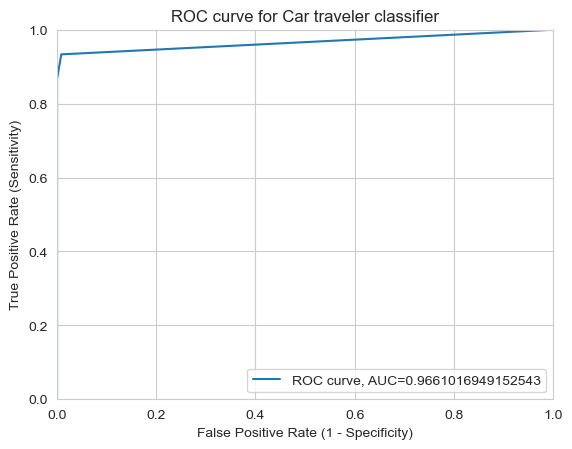

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, knn_prob)
fpr, tpr, thresholds = roc_curve(y_test, knn_prob)
plt.plot(fpr,tpr,label="ROC curve, AUC="+str(auc))
plt.legend(loc=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Car traveler classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# Naive Bayes 

In [68]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [69]:
pred_train_nb = nb.predict(x_train)

In [70]:
conf_train_nb = confusion_matrix(y_train, pred_train_nb)
print(conf_train_nb)

[[257   7]
 [  8  38]]


- True Positive (TP) - 38 employees who traveled by Car were predicted correctly.
- True Negative (TN) - 257 employees who do not traveled by Car were predicted correctly.
- False Positive (FP) - 7 employees who traveled by Car were predicted incorrectly. (Type 1 error)
- False Negaitive (FN) - 8 employees who do not traveled by Car were predicted incorrectly. (Type 2 error)

In [71]:
report_train_nb = classification_report(y_train, pred_train_nb)
print(report_train_knn)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       264
           1       1.00      0.91      0.95        46

    accuracy                           0.99       310
   macro avg       0.99      0.96      0.97       310
weighted avg       0.99      0.99      0.99       310



- Accuracy - 99% (Overall classification accuracy)
- Precision - 100% (When it's predicted that employee travel by Car, how often is the prediction correct?)
- Recall / Sensitivity / True Positive Rate - 91% (When actually employee travel by Car, how often is the prediction correct?)
- Specificity: TN / (TN+FP) - 97% (When actually employee do not travel by Car, how often is the prediction correct?)
- F1 score - 95% (Harmonic mean between Precision & Recall)

In [72]:
pred_test_nb = nb.predict(x_test)
conf_test_nb = confusion_matrix(y_test, pred_test_nb)
print(conf_test_nb)

[[115   3]
 [  3  12]]


- True Positive (TP) - 12 employees who traveled by Car were predicted correctly.
- True Negative (TN) - 115 employees who do not traveled by Car were - -- predicted correctly.
- False Positive (FP) - 3 employees who traveled by Car were predicted incorrectly. (Type 1 error)
- False Negaitive (FN) - 3 employees who do not traveled by Car were predicted incorrectly. (Type 2 error)

In [73]:
report_test_nb = classification_report(y_test, pred_test_nb)
print(report_test_nb)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       118
           1       0.80      0.80      0.80        15

    accuracy                           0.95       133
   macro avg       0.89      0.89      0.89       133
weighted avg       0.95      0.95      0.95       133



- Accuracy - 95% (Overall classification accuracy)
- Precision - 80% (When it's predicted that employee travel by Car, how often is the prediction correct?)
- Recall / Sensitivity / True Positive Rate - 80% (When actually employee travel by Car, how often is the prediction correct?)
- Specificity: TN / (TN+FP) - 97% (When actually employee do not travel by Car, how often is the prediction correct?)
- F1 score - 80% (Harmonic mean between Precision & Recall)
- Accuracy on train is 99% and on test data it is 95%.

In [74]:
y_test.value_counts()

0    118
1     15
Name: Transport_Car, dtype: int64

- Class distribution is '0' - 89% and '1' - 11%

In [75]:
nb_prob = nb.predict_proba(x_test)[:,1]

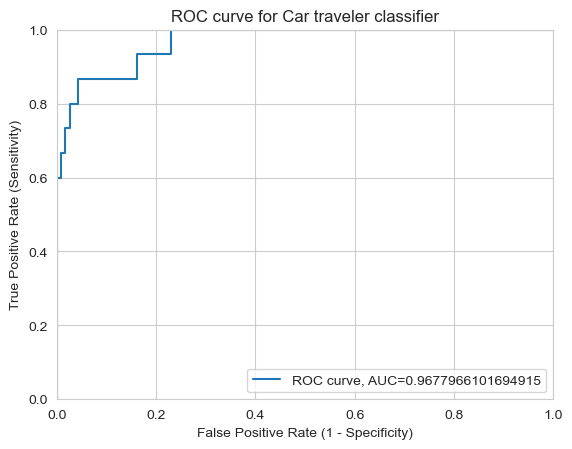

In [76]:
auc = roc_auc_score(y_test, nb_prob)
fpr, tpr, thresholds = roc_curve(y_test, nb_prob)
plt.plot(fpr,tpr,label="ROC curve, AUC="+str(auc))
plt.legend(loc=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Car traveler classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# Logistic regeression

In [77]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\aryxn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
pred_train_lr = lr.predict(x_train)

In [79]:
conf_train_lr = confusion_matrix(y_train, pred_train_lr)
print(conf_train_lr)

[[259   5]
 [  9  37]]


- True Positive (TP) - 33 employees who traveled by Car were predicted correctly.
- True Negative (TN) - 262 employees who do not traveled by Car were predicted correctly.
- False Positive (FP) - 2 employees who traveled by Car were predicted incorrectly. (Type 1 error)
- False Negaitive (FN) - 13 employees who do not traveled by Car were predicted incorrectly. (Type 2 error)

In [80]:
report_train_lr = classification_report(y_train, pred_train_lr)
print(report_train_lr)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       264
           1       0.88      0.80      0.84        46

    accuracy                           0.95       310
   macro avg       0.92      0.89      0.91       310
weighted avg       0.95      0.95      0.95       310



- Accuracy - 95% (Overall classification accuracy)
- Precision - 94% (When it's predicted that employee travel by Car, how often is the prediction correct?)
- Recall / Sensitivity / True Positive Rate - 72% (When actually employee travel by Car, how often is the prediction correct?)
- Specificity: TN / (TN+FP) - 99% (When actually employee do not travel by Car, how often is the prediction correct?)
- F1 score - 81% (Harmonic mean between Precision & Recall)

In [81]:
pred_test_lr = lr.predict(x_test)
conf_test_lr = confusion_matrix(y_test, pred_test_lr)
print(conf_test_lr)

[[116   2]
 [  4  11]]


- True Positive (TP) - 11 employees who traveled by Car were predicted correctly.
- True Negative (TN) - 116 employees who do not traveled by Car were predicted correctly.
- False Positive (FP) - 2 employees who traveled by Car were predicted incorrectly. (Type 1 error)
- False Negaitive (FN) - 4 employees who do not traveled by Car were predicted incorrectly. (Type 2 error)

In [82]:
report_test_lr = classification_report(y_test, pred_test_lr)
print(report_test_lr)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       118
           1       0.85      0.73      0.79        15

    accuracy                           0.95       133
   macro avg       0.91      0.86      0.88       133
weighted avg       0.95      0.95      0.95       133



- Accuracy - 95% (Overall classification accuracy)
- Precision - 85% (When it's predicted that employee travel by Car, how often is the prediction correct?)
- Recall / Sensitivity / True Positive Rate - 73% (When actually employee travel by Car, how often is the prediction correct?)
- Specificity: TN / (TN+FP) - 98% (When actually employee do not travel by Car, how often is the prediction correct?)
- F1 score - 79% (Harmonic mean between Precision & Recall)
- Accuracy on both train and test data is 95%.

In [83]:
lr_prob = lr.predict_proba(x_test)[:,1]

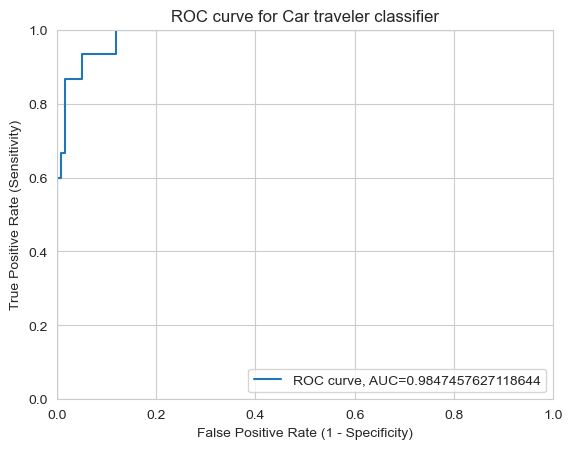

In [84]:
auc = roc_auc_score(y_test, lr_prob)
fpr, tpr, thresholds = roc_curve(y_test, lr_prob)
plt.plot(fpr,tpr,label="ROC curve, AUC="+str(auc))
plt.legend(loc=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Car traveler classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# Comparing All 3 Models

- Sensitivity is important for us as we want to predict Car travelers as correctly as possible.
- KNN Model with 5 neighbours gave the best prediction result with 98% Accuracy, 80% Sensitivity and AUC of 97%

# Bagging

In [85]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()
bag.fit(x_train, y_train)

BaggingClassifier()

In [86]:
pred_train_bag = bag.predict(x_train)

In [87]:
conf_train_bag = confusion_matrix(y_train, pred_train_bag)
print(conf_train_bag)

[[264   0]
 [  1  45]]


- True Positive (TP) - 45 employees who traveled by Car were predicted correctly.
- True Negative (TN) - 263 employees who do not traveled by Car were predicted correctly.
- False Positive (FP) - 1 employees who traveled by Car were predicted incorrectly. (Type 1 error)
- False Negaitive (FN) - 1 employees who do not traveled by Car were predicted incorrectly. (Type 2 error)

In [88]:
report_train_bag = classification_report(y_train, pred_train_bag)
print(report_train_bag)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       1.00      0.98      0.99        46

    accuracy                           1.00       310
   macro avg       1.00      0.99      0.99       310
weighted avg       1.00      1.00      1.00       310



- Accuracy - 99% (Overall classification accuracy)
- Precision - 98% (When it's predicted that employee travel by Car, how often is the prediction correct?)
- Recall / Sensitivity / True Positive Rate - 98% (When actually employee travel by Car, how often is the prediction correct?)
- Specificity: TN / (TN+FP) - 99.6% (When actually employee do not travel by Car, how often is the prediction correct?)
- F1 score - 98% (Harmonic mean between Precision & Recall)

In [89]:
pred_test_bag = bag.predict(x_test)
conf_test_bag = confusion_matrix(y_test, pred_test_bag)
print(conf_test_bag)

[[118   0]
 [  3  12]]


- True Positive (TP) - 11 employees who traveled by Car were predicted correctly.
- True Negative (TN) - 118 employees who do not traveled by Car were predicted correctly.
- False Positive (FP) - 0 employees who traveled by Car were predicted incorrectly. (Type 1 error)
- False Negaitive (FN) - 4 employees who do not traveled by Car were predicted incorrectly. (Type 2 error)

In [90]:
report_test_bag = classification_report(y_test, pred_test_bag)
print(report_test_bag)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       118
           1       1.00      0.80      0.89        15

    accuracy                           0.98       133
   macro avg       0.99      0.90      0.94       133
weighted avg       0.98      0.98      0.98       133



- Accuracy - 97% (Overall classification accuracy)
- Precision - 100% (When it's predicted that employee travel by Car, how often is the prediction correct?)
- Recall / Sensitivity / True Positive Rate - 73% (When actually employee travel by Car, how often is the prediction correct?)
- Specificity: TN / (TN+FP) - 100% (When actually employee do not travel by Car, how often is the prediction correct?)
- F1 score - 89% (Harmonic mean between Precision & Recall)
- Accuracy on train data is 99% and on test data it is 97%.

In [91]:
bag_prob = bag.predict_proba(x_test)[:,1]

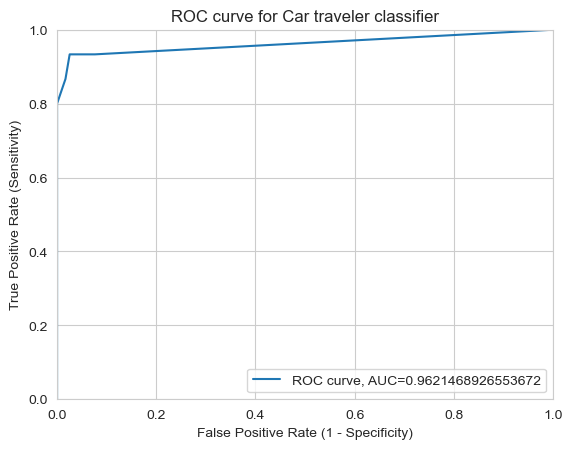

In [92]:
auc = roc_auc_score(y_test, bag_prob)
fpr, tpr, thresholds = roc_curve(y_test, bag_prob)
plt.plot(fpr,tpr,label="ROC curve, AUC="+str(auc))
plt.legend(loc=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Car traveler classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# Boosting - Gradient Boosting Classifier 

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [94]:
pred_train_gb = gb.predict(x_train)

In [95]:
conf_train_gb = confusion_matrix(y_train, pred_train_gb)
print(conf_train_gb)

[[264   0]
 [  0  46]]


- True Positive (TP) - 46 employees who traveled by Car were predicted correctly.
- True Negative (TN) - 264 employees who do not traveled by Car were predicted correctly.
- False Positive (FP) - 0 employees who traveled by Car were predicted incorrectly. (Type 1 error)
- False Negaitive (FN) - 0 employees who do not traveled by Car were predicted incorrectly. (Type 2 error)

In [96]:
report_train_gb = classification_report(y_train, pred_train_gb)
print(report_train_gb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       1.00      1.00      1.00        46

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



- Accuracy - 100% (Overall classification accuracy)
- Precision - 100% (When it's predicted that employee travel by Car, how often is the prediction correct?)
- Recall / Sensitivity / True Positive Rate - 100% (When actually employee travel by Car, how often is the prediction correct?)
- Specificity: TN / (TN+FP) - 100% (When actually employee do not travel by Car, how often is the prediction correct?)
- F1 score - 100% (Harmonic mean between Precision & Recall)

In [97]:
pred_test_gb = gb.predict(x_test)
conf_test_gb = confusion_matrix(y_test, pred_test_gb)
print(conf_test_gb)

[[118   0]
 [  4  11]]


- True Positive (TP) - 11 employees who traveled by Car were predicted correctly.
- True Negative (TN) - 118 employees who do not traveled by Car were predicted correctly.
- False Positive (FP) - 0 employees who traveled by Car were predicted incorrectly. (Type 1 error)
- False Negaitive (FN) - 4 employees who do not traveled by Car were predicted incorrectly. (Type 2 error)

In [98]:
report_test_gb = classification_report(y_test, pred_test_gb)
print(report_test_gb)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       118
           1       1.00      0.73      0.85        15

    accuracy                           0.97       133
   macro avg       0.98      0.87      0.91       133
weighted avg       0.97      0.97      0.97       133



- Accuracy - 97% (Overall classification accuracy)
- Precision - 100% (When it's predicted that employee travel by Car, how often is the prediction correct?)
- Recall / Sensitivity / True Positive Rate - 73% (When actually employee travel by Car, how often is the prediction correct?)
- Specificity: TN / (TN+FP) - 100% (When actually employee do not travel by Car, how often is the prediction correct?)
- F1 score - 85% (Harmonic mean between Precision & Recall)
- Accuracy on train data is 100% and on test data it is 97%.

In [99]:
gb_prob = gb.predict_proba(x_test)[:,1]

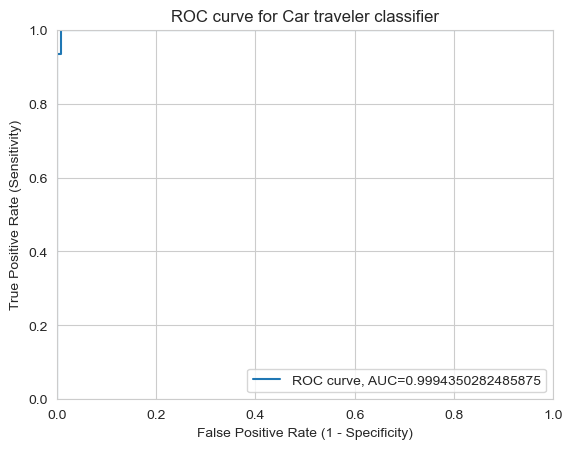

In [100]:
auc = roc_auc_score(y_test, gb_prob)
fpr, tpr, thresholds = roc_curve(y_test, gb_prob)
plt.plot(fpr,tpr,label="ROC curve, AUC="+str(auc))
plt.legend(loc=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Car traveler classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

#  Variable Importance

In [101]:
from sklearn.feature_selection import SelectKBest, chi2
imp_feature = SelectKBest(chi2, k="all").fit(x_train, y_train)

In [102]:
imp_features_df = pd.DataFrame({'Feature':list(x_train.columns),'Scores':imp_feature.scores_})
imp_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
3,Salary,1313.565169
0,Age,118.709481
4,Distance,81.281603
5,license,78.060476
6,Gender_Male,0.897088
1,Engineer,0.589946
2,MBA,0.010984


# Comparing KNN with Bagging and Boosting Model results

- KNN Model and Bagging model have performed best with 98% Accuracy, 80% Sensitivity.
- For Boosting Sensitivity is only 73% on test data.

# Conclusion

- Due to multicollinearity issue, Work Exp variable with high VIF was removed before model building.
- As this project aims to predict employees travelling in Car or not, So Car variable is encoded as '1' and other mode of transport (2Wheeler and Public Transport) are encoded as '0'.
- KNN model with 5 neighbours and Bagging model performed best with most correct predictions:
- Accuracy for both - 98%
- Sensitivity for both - 80%
- AUC for KNN - 97% and AUC for Bagging - 99.9%
- Model Accuracy of KNN on train data is 99% and Sensitivity is 91%.
- Model Accuracy of Bagging on train data is 99% and Sensitivity is 98%.
- Boosting model did extremely well in training data with 100% Accuracy, but the performance in test data was low as we got Accuracy of 97% and Sensitivity of only 73%.
- Boosting model is overfitting.
- Most important feature for the prediction of Car travelers is Salary followed by Age and Distance.
- Almost all the employees who are above the Age of 30 years and also getting Salary more than 30 travels in Car.